### Movie Industry Analysis
Project ini menggunakan dataset yang di*scrap* dari situs IMDb. Untuk dataset dapat diakses pada [link](https://www.kaggle.com/danielgrijalvas/movies) berikut.

In [1]:
# Import Library
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data
movie_df = pd.read_csv(r'C:\Users\db_user\Desktop\movies.csv')

In [2]:
# Look at the data
movie_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


#### Handling Missing Value
Persentase missing value masing-masing kolom:

In [3]:
# Let's first we check percentage missing values of each column
pct_missing_value = round(movie_df.isna().sum()/movie_df.shape[0]*100,2)
pct_missing_value

name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64

##### Budget
Sesuai dengan deskripsi dari [sumber dataset nya](https://www.kaggle.com/danielgrijalvas/movies) dikatakan, *'the budget of a movie. Some movies don't have this, so it appears as 0'.* Jadi kolom budget untuk missing values nya dapat diisi dengan value 0.

##### Rating
*Why are certain movies and shows missing an IMDb community rating? We don't display a rating unless a movie or show has received enough votes to calculate a weighted user rating. We do not display votes for a movie or show before it has actually been screened/released.* Menyesuaikan dengan deskripsi tersebut, untuk missing values kolom rating ini bisa diisi dengan 'Not Rated'

##### Votes
Untuk votes, make sense jika di isi NaN dengan angka 0. Asumsi nya adalah jika tidak ada nilai apapun dalam votes, berarti memang belum ada individu yang mem-votes nya di ImDB.

##### Others Column
Untuk column release, score, writer, star, country, company, runtime, gross sepertinya row yang memiliki missing value dapat dibuang saja untuk mengurangi bias result pada saat analisis nanti

In [4]:
# Imputting missing value with description above
movie_df['rating'] = movie_df['rating'].fillna('Not Rated')
movie_df['budget'] = movie_df['budget'].fillna(0)
movie_df['votes'] = movie_df['votes'].fillna(0)

# Drop any row that have missing value
movie_df = movie_df.dropna(axis=0, how='any')

# Drop also any duplicates row
movie_df = movie_df.drop_duplicates()

Shape dan jumlah missing value dari dataframe setelah diberi perlakuan diatas:

In [5]:
print(movie_df.shape)
movie_df.isnull().sum()

(7464, 15)


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

#### Handling Unwanted Data Types of Each Columns

In [6]:
# Data Types dari masing-masing kolom
print(movie_df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


##### Votes
Oleh karena votes merepresentasikan tiap individu, maka kita ganti data type nya ke integer

##### Runtime
Sesuai deskripsi ini dari situs IMDb:

*The IMDb running times section records the duration in minutes of titles in the database. For theatrical releases the timing begins from the first distributor logo and ends at the last frame of the end credits. If there are any mid or post credits scenes, these should also be included in the running time. For TV-series we prefer to include the time without commercials, but we appreciate such timings are not always easily available so total running times may be submitted instead as long as the attribute (including commercials) is used. Running times should be rounded to the nearest minute. For titles of less than one minute duration, the running time in seconds can be added as an attribute.*

Untuk memudahkan analisis dan menghindari kebingungan, nama kolom runtime kita 'rename' menjadi 'runtime(min)', dan kita convert saja ke integer.

##### Gross dan Budget
Oleh karena gross dan budget merepresentasikan monetary value, maka dapat kita ganti ke tipe data integer.


In [7]:
# Change data types as description above
movie_df = movie_df.astype({"budget":'int64', "gross":'int64', "votes":'int64', 'runtime':'int64'})
movie_df = movie_df.rename(columns={'runtime':'runtime(min)'})

Berikut adalah data type dari kolom setelah diberi perlakuan diatas

In [8]:
movie_df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes             int64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime(min)      int64
dtype: object

Dataframe pun siap untuk dianalisis

#### Analysis


##### Top 15 Film dengan score dan votes terbaik

In [9]:
TopScoreVotes = movie_df[['name', 'score', 'votes', 'genre', 'rating']].set_index('name').sort_values(by=['score', 'votes'], ascending=False).head(15)
TopScoreVotes

,score,votes,genre,rating
name,,,,
The Shawshank Redemption,9.3,2400000,Drama,R
The Dark Knight,9.0,2400000,Action,PG-13
Pulp Fiction,8.9,1900000,Crime,R
The Lord of the Rings: The Return of the King,8.9,1700000,Action,PG-13
Schindler's List,8.9,1200000,Biography,R
Inception,8.8,2100000,Action,PG-13
Forrest Gump,8.8,1900000,Drama,PG-13
Fight Club,8.8,1900000,Drama,R
The Lord of the Rings: The Fellowship of the Ring,8.8,1700000,Action,PG-13


##### Top Company by Budget

In [10]:
## Bagaimana pendapatan dari masing-masing film per company
BudgetPerCompany = movie_df.groupby('company')[['budget']].sum().sort_values(by='budget', ascending=False)
TopBud15Company = BudgetPerCompany.head(15)
TopBud15Company

,budget
company,
Warner Bros.,19568300000
Universal Pictures,15989730001
Columbia Pictures,15512107000
Paramount Pictures,13723450000
Twentieth Century Fox,11474600000
Walt Disney Pictures,10404700000
New Line Cinema,5648200000
Touchstone Pictures,4153700000
Dreamworks Pictures,3961700000


##### Top Company by Gross

In [11]:
## Bagaimana pendapatan dari masing-masing film per company
GrossPerCompany = movie_df.groupby('company')[['gross']].sum().sort_values(by='gross', ascending=False)
Top15Company = GrossPerCompany.head(15)
Top15Company

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


##### Korelasi antara Budget dan Gross

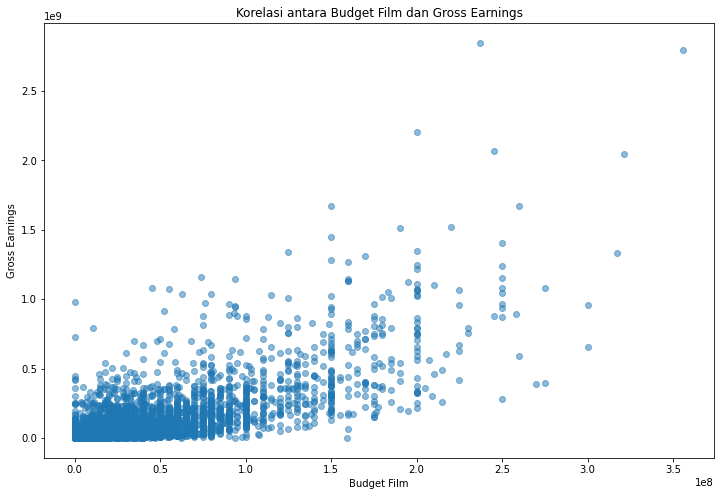

In [12]:
# Liat bagaimana korelasi antara budget dan gross
plt.scatter(x=movie_df['budget'], y=movie_df['gross'], alpha=0.5)
plt.title('Korelasi antara Budget Film dan Gross Earnings')
plt.xlabel('Budget Film')
plt.ylabel('Gross Earnings')
plt.show()